### Preprocessing the daset for sentiment analysis

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
# Load dataset
data = pd.read_csv("glassdoor_reviews.csv", sep=',')
data.head(5)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [3]:
# data set dimentions
data.shape

(838566, 18)

In [4]:
discard = [col for col in data.columns if col not in ['overall_rating','pros','cons']] 
data  = data.drop(columns = discard)

In [5]:
# data.head(10)

<Axes: >

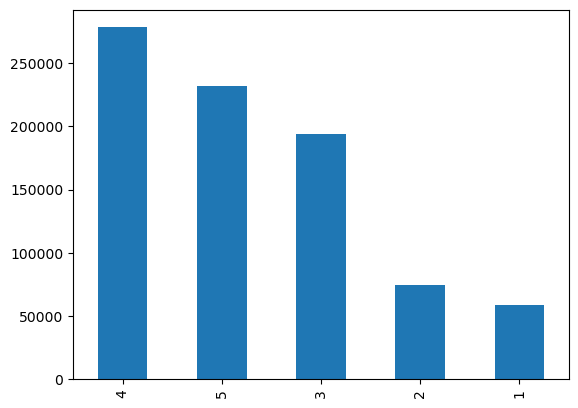

In [6]:
data['overall_rating'].value_counts().plot(kind='bar')

In [7]:
# join columns pros and cons
data_melted = pd.melt(data, id_vars =['overall_rating'], value_vars =['pros', 'cons'])
data_melted = data_melted.rename(columns={'value': 'review','variable': 'review_type' })

# data_melted.head()

In [8]:
data_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677132 entries, 0 to 1677131
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall_rating  1677132 non-null  int64 
 1   review_type     1677132 non-null  object
 2   review          1677124 non-null  object
dtypes: int64(1), object(2)
memory usage: 38.4+ MB


In [9]:
# addiing a setntiment column
data_melted['sentiment'] = 0

# data_melted.head(2)

##### Assigning sentiment

9 - Extremely Positive: pros with overall rating is 5 

8 - Very Positive: pros with overall rating is 4

7 - Moderately Positive: pros with overall rating is 3

6 - Slightly Positive: pros with overall rating is 2

5 - Neurtal: pros with overall rating is 1, and cons with overall raiting 5 

4 - Slightly Negative: cons with overall raiting 4

3- Moderately Negative: cons with overall raiting 3

2- Very Negative: cons with overall raiting 2

1- Extremely Negative: cons with overall raiting 1

In [10]:
data_melted.loc[(data_melted['review_type'] == 'pros') & (data_melted['overall_rating'] == 5), 'sentiment'] = "extremly positive"
data_melted.loc[(data_melted['review_type'] == 'pros') & (data_melted['overall_rating'] == 4), 'sentiment'] = "very positive"
data_melted.loc[(data_melted['review_type'] == 'pros') & (data_melted['overall_rating'] == 3), 'sentiment'] = "moderately positive"
data_melted.loc[(data_melted['review_type'] == 'pros') & (data_melted['overall_rating'] == 2), 'sentiment'] = "slightly positive"
data_melted.loc[(data_melted['review_type'] == 'pros') & (data_melted['overall_rating'] == 1), 'sentiment'] = "neutral"

data_melted.loc[(data_melted['review_type'] == 'cons') & (data_melted['overall_rating'] == 5), 'sentiment'] = "neutral"
data_melted.loc[(data_melted['review_type'] == 'cons') & (data_melted['overall_rating'] == 4), 'sentiment'] = "slightly negative"
data_melted.loc[(data_melted['review_type'] == 'cons') & (data_melted['overall_rating'] == 3), 'sentiment'] = "moderately negative"
data_melted.loc[(data_melted['review_type'] == 'cons') & (data_melted['overall_rating'] == 2), 'sentiment'] = "very negative"
data_melted.loc[(data_melted['review_type'] == 'cons') & (data_melted['overall_rating'] == 1), 'sentiment'] = "extremly negative"

In [11]:
data_melted.head(10)

,overall_rating,review_type,review,sentiment
0,2,pros,Very friendly and welcoming to new staff. Easy...,slightly positive
1,2,pros,"Friendly, helpful and hard-working colleagues",slightly positive
2,1,pros,Easy to get the job even without experience in...,neutral
3,5,pros,Nice staff to work with,extremly positive
4,1,pros,"Easy to get the job, Nice colleagues.",neutral
5,3,pros,Some good people to work with.\n\nFlexible wor...,moderately positive
6,1,pros,Good investment management strategy. Overall t...,neutral
7,5,pros,The people are great and the culture is very f...,extremly positive
8,4,pros,"Nice Staff, good HR Team.\r\nFeels vibrant and...",very positive
9,1,pros,Made some life time friends.,neutral


In [12]:
discard = [col for col in data_melted.columns if col not in ['review','sentiment']] 
data_final = data_melted.drop(columns = discard)

In [13]:
data_final.head(3)

,review,sentiment
0,Very friendly and welcoming to new staff. Easy...,slightly positive
1,"Friendly, helpful and hard-working colleagues",slightly positive
2,Easy to get the job even without experience in...,neutral


In [14]:
data_final.shape

(1677132, 2)

In [48]:
# Save as csv file

data_final.to_csv('glassdoor_reviews_reshaped.csv', index=False, sep=',')

In [49]:
# Test if file is working
test = pd.read_csv('glassdoor_reviews_reshaped.csv', sep=',')
test.shape

(1677132, 2)

In [50]:
test.head(10)

,review,sentiment
0,Very friendly and welcoming to new staff. Easy...,slightly positive
1,"Friendly, helpful and hard-working colleagues",slightly positive
2,Easy to get the job even without experience in...,neutral
3,Nice staff to work with,extremly positive
4,"Easy to get the job, Nice colleagues.",neutral
5,Some good people to work with.\n\nFlexible wor...,moderately positive
6,Good investment management strategy. Overall t...,neutral
7,The people are great and the culture is very f...,extremly positive
8,"Nice Staff, good HR Team.\r\nFeels vibrant and...",very positive
9,Made some life time friends.,neutral


<Axes: >

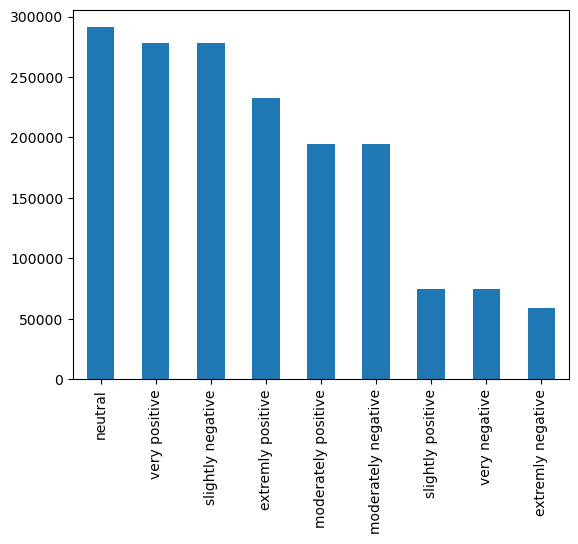

In [15]:
data_final['sentiment'].value_counts().plot(kind='bar')